In [ ]:
# Google Colabでライブラリをアップロードする
from google.colab import files
uploaded = files.upload()

In [ ]:
# Google Colabでドライブのデータを使う
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Google Colabでライブラリをインストールする
!pip install japanize_matplotlib bottleneck tslearn

In [2]:
# 自作関数
import MasterResearchFunction as mr

# 基本ライブラリ
import os, re, csv, math, statistics
from datetime import datetime, timedelta
from decimal import Decimal
import pickle

# 数値計算とデータ処理
import numpy as np
import pandas as pd
import bottleneck as bn

# 機械学習ライブラリ
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ディープラーニングライブラリ
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Conv1D, MaxPooling1D, Flatten

# プロットと可視化
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib

# その他のライブラリ
from scipy import signal, stats
from scipy.signal import savgol_filter
from scipy.spatial.distance import euclidean
from scipy.interpolate import interp1d
from tslearn.metrics import dtw_path
from fastdtw import fastdtw

In [ ]:
#Apple Watchのモーションデータの読み込み
a_yuuma_motion_data = mr.process_apple_watch_csv("datasets/yuuma/20240604/yuuma_motion.csv")
b_sakamoto_motion_data = mr.process_apple_watch_csv("datasets/sakamoto/20240604/sakamoto_motion.csv")
c_watabe_motion_data = mr.process_apple_watch_csv("datasets/watabe/20240605/watabe_motion.csv")
d_nakazawa_motion_data = mr.process_apple_watch_csv("datasets/nakazawa/20240606/nakazawa_motion.csv")
e_okede_motion_data = mr.process_apple_watch_csv("datasets/okeda/20240607/okeda_motion.csv")
# a_yuuma_motion_data = mr.process_apple_watch_csv("/content/drive/MyDrive/datasets/yuuma/20240604/yuuma_motion.csv")
# b_sakamoto_motion_data = mr.process_apple_watch_csv("/content/drive/MyDrive/datasets/sakamoto/20240604/sakamoto_motion.csv")
# c_watabe_motion_data = mr.process_apple_watch_csv("/content/drive/MyDrive/datasets/watabe/20240605/watabe_motion.csv")
# d_nakazawa_motion_data = mr.process_apple_watch_csv("/content/drive/MyDrive/datasets/nakazawa/20240606/nakazawa_motion.csv")
# e_okeda_motion_data = mr.process_apple_watch_csv("/content/drive/MyDrive/datasets/okeda/20240607/okeda_motion.csv")

In [2]:
#Tobiiのモーションデータの読み込み
a_yuuma_eye_data = mr.process_tobii_csv("datasets/yuuma/20240604/yuuma_eye.csv")
b_sakamoto_eye_data = mr.process_tobii_csv("datasets/sakamoto/20240604/sakamoto_eye.csv")
c_watabe_eye_data = mr.process_tobii_csv("datasets/watabe/20240605/watabe_eye.csv")
d_nakazawa_eye_data = mr.process_tobii_csv("datasets/nakazawa/20240606/nakazawa_eye.csv")
e_okeda_eye_data = mr.process_tobii_csv("datasets/okeda/20240607/okeda_eye.csv")
# a_yuuma_eye_data = mr.process_tobii_csv("/content/drive/MyDrive/datasets/yuuma/20240604/yuuma_eye.csv")
# b_sakamoto_eye_data = mr.process_tobii_csv("/content/drive/MyDrive/datasets/sakamoto/20240604/sakamoto_eye.csv")
# c_watabe_eye_data = mr.process_tobii_csv("/content/drive/MyDrive/datasets/watabe/20240605/watabe_eye.csv")
# d_nakazawa_eye_data = mr.process_tobii_csv("/content/drive/MyDrive/datasets/nakazawa/20240606/nakazawa_eye.csv")
# e_okeda_eye_data = mr.process_tobii_csv("/content/drive/MyDrive/datasets/okeda/20240607/okeda_eye.csv")

/Users/hinase/CodeChord/MasterResearch/MasterResearchFunction.py:79: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  eye_data = pd.read_csv(file_path, header=0)
/Users/hinase/CodeChord/MasterResearch/MasterResearchFunction.py:79: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  eye_data = pd.read_csv(file_path, header=0)
/Users/hinase/CodeChord/MasterResearch/MasterResearchFunction.py:79: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  eye_data = pd.read_csv(file_path, header=0)
/Users/hinase/CodeChord/MasterResearch/MasterResearchFunction.py:79: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  eye_data = pd.read_csv(file_path, header=0)


In [ ]:
#a_yuumaくんの教師データ読み込み
a_yuuma_check = mr.process_all_apple_watch_csv_in_directory("datasets/yuuma/train_gesture/check")
a_yuuma_circle = mr.process_all_apple_watch_csv_in_directory("datasets/yuuma/train_gesture/circle")
a_yuuma_cross = mr.process_all_apple_watch_csv_in_directory("datasets/yuuma/train_gesture/cross(new)")
a_yuuma_tri = mr.process_all_apple_watch_csv_in_directory("datasets/yuuma/train_gesture/tri")
# a_yuuma_check = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/yuuma/train_gesture/check")
# a_yuuma_circle = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/yuuma/train_gesture/circle")
# a_yuuma_cross = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/yuuma/train_gesture/cross(new)")
# a_yuuma_tri = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/yuuma/train_gesture/tri")

In [ ]:
#b_sakamotoくんの教師データ読み込み
b_sakamoto_check = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(old)/check")
b_sakamoto_circle = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(old)/circle")
b_sakamoto_cross = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(old)/cross")
b_sakamoto_tri = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(old)/tri")
# b_sakamoto_check = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(old)/check")
# b_sakamoto_circle = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(old)/circle")
# b_sakamoto_cross = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(old)/cross")
# b_sakamoto_tri = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(old)/tri")

In [ ]:
#b_sakamotoくんの教師データ読み込み
b_sakamoto_check = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(new)/check")
b_sakamoto_circle = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(new)/circle")
b_sakamoto_cross = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(new)/cross")
b_sakamoto_tri = mr.process_all_apple_watch_csv_in_directory("datasets/sakamoto/train_gesture(new)/tri")
# b_sakamoto_check = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(new)/check")
# b_sakamoto_circle = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(new)/circle")
# b_sakamoto_cross = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(new)/cross")
# b_sakamoto_tri = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/sakamoto/train_gesture(new)/tri")

In [ ]:
#c_watabeくんの教師データ読み込み
c_watabe_check = mr.process_all_apple_watch_csv_in_directory("datasets/watabe/train_gesture/check")
c_watabe_circle = mr.process_all_apple_watch_csv_in_directory("datasets/watabe/train_gesture/circle")
c_watabe_cross = mr.process_all_apple_watch_csv_in_directory("datasets/watabe/train_gesture/cross")
c_watabe_tri = mr.process_all_apple_watch_csv_in_directory("datasets/watabe/train_gesture/tri")
# c_watabe_check = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/watabe/train_gesture/check")
# c_watabe_circle = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/watabe/train_gesture/circle")
# c_watabe_cross = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/watabe/train_gesture/cross")
# c_watabe_tri = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/watabe/train_gesture/tri")

In [ ]:
#d_nakazawaくんの教師データ読み込み
d_nakazawa_check = mr.process_all_apple_watch_csv_in_directory("datasets/nakazawa/train_gesture/check")
d_nakazawa_circle = mr.process_all_apple_watch_csv_in_directory("datasets/nakazawa/train_gesture/circle")
d_nakazawa_cross = mr.process_all_apple_watch_csv_in_directory("datasets/nakazawa/train_gesture/cross")
d_nakazawa_tri = mr.process_all_apple_watch_csv_in_directory("datasets/nakazawa/train_gesture/tri")
# d_nakazawa_check = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/nakazawa/train_gesture/check")
# d_nakazawa_circle = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/nakazawa/train_gesture/circle")
# d_nakazawa_cross = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/nakazawa/train_gesture/cross")
# d_nakazawa_tri = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/nakazawa/train_gesture/tri")

In [ ]:
#e_okedaくんの教師データ読み込み
e_okeda_check = mr.process_all_apple_watch_csv_in_directory("datasets/okeda/train_gesture/check")
e_okeda_circle = mr.process_all_apple_watch_csv_in_directory("datasets/okeda/train_gesture/circle")
e_okeda_cross = mr.process_all_apple_watch_csv_in_directory("datasets/okeda/train_gesture/cross")
e_okeda_tri = mr.process_all_apple_watch_csv_in_directory("datasets/okeda/train_gesture/tri")
# e_okeda_check = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/okeda/train_gesture/check")
# e_okeda_circle = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/okeda/train_gesture/circle")
# e_okeda_cross = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/okeda/train_gesture/cross")
# e_okeda_tri = mr.process_all_apple_watch_csv_in_directory("/content/drive/MyDrive/datasets/okeda/train_gesture/tri")

In [78]:
motion_data = mr.process_apple_watch_csv('/Users/hinase/Downloads/tri_check_MotionData_20240906_184048.csv')
#train_data = mr.process_all_apple_watch_csv_in_directory('/Users/hinase/Downloads/circle')
eye_data = mr.process_tobii_csv('/Users/hinase/Downloads/gesture_tri_check.csv')

In [79]:
eye_data["Timestamp"]

1       2024-09-06 18:40:38.987000
2       2024-09-06 18:40:39.006980
3       2024-09-06 18:40:39.026969
4       2024-09-06 18:40:39.046949
5       2024-09-06 18:40:39.066937
                   ...            
11595   2024-09-06 18:44:29.730905
11596   2024-09-06 18:44:29.750886
11597   2024-09-06 18:44:29.770870
11598   2024-09-06 18:44:29.790850
11599   2024-09-06 18:44:29.810868
Name: Timestamp, Length: 11549, dtype: datetime64[ns]

In [81]:
motion_data["Timestamp"]

0       2024-09-06 18:40:48.963167906
1       2024-09-06 18:40:48.971939087
2       2024-09-06 18:40:48.981434107
3       2024-09-06 18:40:48.991765022
4       2024-09-06 18:40:49.001482010
                     ...             
20290   2024-09-06 18:44:11.746072054
20291   2024-09-06 18:44:11.756109953
20292   2024-09-06 18:44:11.766242981
20293   2024-09-06 18:44:11.776288033
20294   2024-09-06 18:44:11.786274910
Name: Timestamp, Length: 20295, dtype: datetime64[ns]

In [ ]:
#hinase_circle_seg = mr.three_axis_spring(motion_data, train_data, [5, 5, 5], 'acc')

In [9]:
Hz = 100

In [12]:
final = mr.filter_and_combine_segments(hinase_circle_seg, Hz, 0.75, 4)

In [13]:
final

[(31007, 31359),
 (31803, 32048),
 (32332, 32615),
 (32850, 33122),
 (33419, 33725),
 (34217, 34431),
 (34720, 34999),
 (37179, 37493),
 (37773, 38091),
 (38428, 38688),
 (39090, 39305)]

In [82]:
def find_true_intervals(df):
    # 'Marking' カラムがTrueとなっている箇所を抽出
    true_intervals = []
    start_index = None

    for index, row in df.iterrows():
        if row['Marking']:
            if start_index is None:
                start_index = index
        else:
            if start_index is not None:
                true_intervals.append((start_index, index - 1))
                start_index = None

    # 最後のTrueの区間がデータフレームの最後まで続く場合
    if start_index is not None:
        true_intervals.append((start_index, df.index[-1]))

    return true_intervals

In [83]:
a = find_true_intervals(motion_data)

In [84]:
a

[(611, 904),
 (1040, 1356),
 (1536, 1876),
 (2022, 2359),
 (2488, 2826),
 (3095, 3418),
 (3549, 3879),
 (4063, 4398),
 (4590, 4941),
 (5138, 5494),
 (5665, 5995),
 (6157, 6486),
 (6614, 6947),
 (7072, 7422),
 (7730, 8081),
 (8214, 8581),
 (8811, 9179),
 (9302, 9628),
 (9937, 10278),
 (10930, 11200),
 (11378, 11611),
 (11834, 12084),
 (12280, 12533),
 (12701, 12934),
 (13120, 13395),
 (13535, 13788),
 (13941, 14222),
 (14397, 14655),
 (14806, 15054),
 (15349, 15612),
 (15761, 16013),
 (16156, 16400),
 (16548, 16796),
 (16951, 17189),
 (17323, 17586),
 (17813, 18079),
 (18247, 18513),
 (18711, 18956),
 (19087, 19334),
 (19500, 19748),
 (19764, 19866)]

In [85]:
b = []
for i in range(len(a)):
  b.append([a[i][0]+40, a[i][1]-40])

In [86]:
b

[[651, 864],
 [1080, 1316],
 [1576, 1836],
 [2062, 2319],
 [2528, 2786],
 [3135, 3378],
 [3589, 3839],
 [4103, 4358],
 [4630, 4901],
 [5178, 5454],
 [5705, 5955],
 [6197, 6446],
 [6654, 6907],
 [7112, 7382],
 [7770, 8041],
 [8254, 8541],
 [8851, 9139],
 [9342, 9588],
 [9977, 10238],
 [10970, 11160],
 [11418, 11571],
 [11874, 12044],
 [12320, 12493],
 [12741, 12894],
 [13160, 13355],
 [13575, 13748],
 [13981, 14182],
 [14437, 14615],
 [14846, 15014],
 [15389, 15572],
 [15801, 15973],
 [16196, 16360],
 [16588, 16756],
 [16991, 17149],
 [17363, 17546],
 [17853, 18039],
 [18287, 18473],
 [18751, 18916],
 [19127, 19294],
 [19540, 19708],
 [19804, 19826]]

In [87]:
c = []
for i in range(len(b)):
  c.append([motion_data["Timestamp"][b[i][0]], motion_data["Timestamp"][b[i][1]]])

In [88]:
c

[[Timestamp('2024-09-06 18:40:55.468132973'),
  Timestamp('2024-09-06 18:40:57.597007990')],
 [Timestamp('2024-09-06 18:40:59.755753040'),
  Timestamp('2024-09-06 18:41:02.114550114')],
 [Timestamp('2024-09-06 18:41:04.712991953'),
  Timestamp('2024-09-06 18:41:07.311584949')],
 [Timestamp('2024-09-06 18:41:09.570297956'),
  Timestamp('2024-09-06 18:41:12.138729095')],
 [Timestamp('2024-09-06 18:41:14.227610111'),
  Timestamp('2024-09-06 18:41:16.806167126')],
 [Timestamp('2024-09-06 18:41:20.294207096'),
  Timestamp('2024-09-06 18:41:22.722948074')],
 [Timestamp('2024-09-06 18:41:24.831604004'),
  Timestamp('2024-09-06 18:41:27.330271006')],
 [Timestamp('2024-09-06 18:41:29.968724966'),
  Timestamp('2024-09-06 18:41:32.517353058')],
 [Timestamp('2024-09-06 18:41:35.235826969'),
  Timestamp('2024-09-06 18:41:37.944262028')],
 [Timestamp('2024-09-06 18:41:40.712801933'),
  Timestamp('2024-09-06 18:41:43.471261024')],
 [Timestamp('2024-09-06 18:41:45.979729176'),
  Timestamp('2024-09-06 

In [89]:
len(c)

41

In [90]:
# 各範囲内のデータを格納するリストを用意します
result = []
# cの各行に対してループを回します
for start_time, end_time in c:
    # 範囲内のデータを抽出するためのマスクを作成します
    mask = (eye_data["Timestamp"] >= start_time) & (eye_data["Timestamp"] <= end_time)
    # マスクを適用してデータを抽出します
    data_in_range = eye_data.loc[mask]
    # 結果をリストに追加します
    result.append(data_in_range)

# 結果を確認します
for idx, data in enumerate(result):
    print(f"範囲 {idx+1}:")
    print(data)
    print("\n")

範囲 1:
          Sensor Participant name Event  Event value  Gaze point X  \
834  Eye Tracker       kawano (7)   NaN          NaN        1033.0   
835  Eye Tracker       kawano (7)   NaN          NaN        1030.0   
836  Eye Tracker       kawano (7)   NaN          NaN        1026.0   
837  Eye Tracker       kawano (7)   NaN          NaN        1022.0   
838  Eye Tracker       kawano (7)   NaN          NaN        1020.0   
..           ...              ...   ...          ...           ...   
936  Eye Tracker       kawano (7)   NaN          NaN        1186.0   
937  Eye Tracker       kawano (7)   NaN          NaN        1195.0   
938  Eye Tracker       kawano (7)   NaN          NaN        1204.0   
939  Eye Tracker       kawano (7)   NaN          NaN        1209.0   
940  Eye Tracker       kawano (7)   NaN          NaN        1210.0   

     Gaze point Y  Gaze point 3D X  Gaze point 3D Y  Gaze point 3D Z  \
834         627.0         -32.4574          -8.8956         350.5608   
835      

In [102]:
# resultがリストである場合
first_20_results = result[0:20]

In [103]:
first_20_results[19]

,Sensor,Participant name,Event,Event value,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,...,Fixation point X,Fixation point Y,Ungrouped,Timestamp,Gaze2D_Distance,Fixation_Distance,Gaze3D_Distance,Pupil_Diameter_Change,GazeDirection_Distance,PupilPosition_Distance
6014,Eye Tracker,kawano (7),NaN,NaN,1003.0,736.0,-18.3820,-33.4536,279.1393,-0.15985,...,1017.0,700.0,NaN,2024-09-06 18:42:38.616554,9.219544,0.0,11.661944,-0.0055,0.006011,0.022361
6015,Eye Tracker,kawano (7),NaN,NaN,999.0,730.0,-17.4529,-32.1577,279.5558,-0.15707,...,1017.0,700.0,NaN,2024-09-06 18:42:38.636544,7.211103,0.0,1.648046,-0.0185,0.005124,0.023660
6016,Eye Tracker,kawano (7),NaN,NaN,997.0,723.0,-16.7891,-30.3173,278.9133,-0.15564,...,1017.0,700.0,NaN,2024-09-06 18:42:38.656519,7.280110,0.0,2.059250,-0.0150,0.006181,0.018251
6017,Eye Tracker,kawano (7),NaN,NaN,995.0,717.0,-16.4346,-29.0604,281.8656,-0.15345,...,1017.0,700.0,NaN,2024-09-06 18:42:38.676506,6.324555,0.0,3.228241,-0.0120,0.004495,0.017071
6018,Eye Tracker,kawano (7),NaN,NaN,991.0,719.0,-15.2305,-29.0194,275.2479,-0.15247,...,1017.0,700.0,NaN,2024-09-06 18:42:38.696488,4.472136,0.0,6.726477,-0.0115,0.004010,0.015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,Eye Tracker,kawano (7),NaN,NaN,1050.0,648.0,-78.8274,-32.0864,737.6594,-0.14011,...,1073.0,538.0,NaN,2024-09-06 18:42:40.415481,13.928388,0.0,19.261826,-0.0265,0.012698,0.051495
6106,Eye Tracker,kawano (7),NaN,NaN,1052.0,631.0,-82.3415,-21.7197,753.5308,-0.14267,...,1073.0,538.0,NaN,2024-09-06 18:42:40.435468,17.117243,0.0,19.280008,-0.0240,0.013372,0.078875
6107,Eye Tracker,kawano (7),NaN,NaN,1055.0,614.0,-81.7651,-10.4534,733.2549,-0.14555,...,1073.0,538.0,NaN,2024-09-06 18:42:40.455476,17.262677,0.0,23.202885,-0.0300,0.014979,0.071665
6108,Eye Tracker,kawano (7),NaN,NaN,1064.0,596.0,-82.9525,1.4314,693.3422,-0.15426,...,1073.0,538.0,NaN,2024-09-06 18:42:40.475464,20.124612,0.0,41.661517,-0.0285,0.019008,0.075822


In [104]:
# pickleファイルに出力する
with open('/Users/hinase/Downloads/kawano_tri_eye.pkl', 'wb') as f:
    pickle.dump(first_20_results, f)

In [48]:
for i in range(len(b)):
  print(b[i][1] - b[i][0])

259
263
260
283
305
300
306
290
273
286
243
274
235
218
275
269
270
288
251
268
239
247
263
278
290
313
310
295
313
306
312
282
266
248
280
245
322
283
297
289
282
288
290


In [35]:
import pickle
with open('/Users/hinase/Downloads/kawano_circle_eye.pkl', 'rb') as f:
    circle_eye = pickle.load(f)
with open('/Users/hinase/Downloads/kawano_cross_eye.pkl', 'rb') as f:
    cross_eye = pickle.load(f)
with open('/Users/hinase/Downloads/kawano_tri_eye.pkl', 'rb') as f:
    tri_eye = pickle.load(f)
with open('/Users/hinase/Downloads/kawano_check_eye.pkl', 'rb') as f:
    check_eye = pickle.load(f)

In [36]:
# データフレームを縦方向に連結
kawano_eye = []
kawano_eye.extend(circle_eye)
kawano_eye.extend(cross_eye)
kawano_eye.extend(tri_eye)
kawano_eye.extend(check_eye)

In [37]:
kawano_eye[0]['Gaze event duration']

602    939
603    939
604    939
605    939
606    939
      ... 
712    180
713    180
714    180
715    180
716     80
Name: Gaze event duration, Length: 115, dtype: int64

In [38]:
kawano_eye[0].columns

Index(['Sensor', 'Participant name', 'Event', 'Event value', 'Gaze point X',
       'Gaze point Y', 'Gaze point 3D X', 'Gaze point 3D Y', 'Gaze point 3D Z',
       'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil position left X', 'Pupil position left Y',
       'Pupil position left Z', 'Pupil position right X',
       'Pupil position right Y', 'Pupil position right Z',
       'Pupil diameter left', 'Pupil diameter right', 'Validity left',
       'Validity right', 'Eye movement type', 'Gaze event duration',
       'Eye movement type index', 'Fixation point X', 'Fixation point Y',
       'Ungrouped', 'Timestamp', 'Gaze2D_Distance', 'Fixation_Distance',
       'Gaze3D_Distance', 'Pupil_Diameter_Change', 'GazeDirection_Distance',
       'PupilPosition_Distance'],
      dtype='object')

In [39]:
# リスト内包表記で一度にリストを作成
label = [s for s in ['circle', 'cross', 'tri', 'check'] for _ in range(20)]
print(label)

['circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'cross', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'tri', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check', 'check']


In [45]:
from sklearn.model_selection import train_test_split#データ分割用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト
import pandas as pd

In [46]:
X = []
for i in range(len(kawano_eye)):
  X.append(kawano_eye[i].drop(columns=[
        'Sensor', 'Participant name', 'Event', 'Event value',
        'Eye movement type', 'Eye movement type index', 'Ungrouped', 'Timestamp', 'Validity left', 'Validity right', 'Gaze event duration', 'Gaze2D_Distance', 'Fixation_Distance', 'Gaze3D_Distance', 'Pupil_Diameter_Change',	'GazeDirection_Distance', 'PupilPosition_Distance'
    ]))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [47]:
X[7]

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,...,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Fixation point X,Fixation point Y
2511,1158.0,1012.0,-43.2794,-78.1795,219.0985,-0.27436,-0.11780,0.95438,-0.05666,-0.25785,...,31.85,-30.93,-29.83,-32.36,-27.82,-30.64,5.880,5.957,1063.0,849.0
2512,1165.0,1004.0,-44.5241,-76.5654,218.8336,-0.28799,-0.12130,0.94992,-0.05304,-0.24247,...,31.89,-30.91,-29.83,-32.36,-27.79,-30.67,5.817,6.024,1063.0,849.0
2513,1161.0,984.0,-39.3339,-65.5157,196.9231,-0.28022,-0.10396,0.95429,-0.04780,-0.20579,...,31.93,-30.89,-29.83,-32.33,-27.75,-30.68,5.845,6.146,1063.0,849.0
2514,1128.0,955.0,-33.0353,-59.3415,192.5309,-0.24243,-0.06573,0.96794,-0.04126,-0.19914,...,31.98,-30.87,-29.81,-32.32,-27.73,-30.66,5.949,6.148,1063.0,849.0
2515,1104.0,912.0,-30.6468,-54.8982,201.9765,-0.21738,-0.04164,0.97520,-0.03724,-0.17642,...,32.02,-30.86,-29.80,-32.30,-27.72,-30.63,6.044,6.206,1063.0,849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,1198.0,90.0,-58.4949,108.8248,242.7859,-0.20983,0.40138,0.89155,-0.16083,0.47953,...,31.72,-29.52,-29.77,-33.01,-26.58,-30.93,6.014,6.211,1162.0,66.0
2639,1226.0,117.0,-61.3864,97.9369,231.0727,-0.22264,0.38948,0.89372,-0.18541,0.46180,...,31.65,-29.59,-29.75,-33.09,-26.66,-30.88,6.062,6.189,1162.0,66.0
2640,1266.0,138.0,-69.7712,94.1600,232.5196,-0.23798,0.37728,0.89500,-0.22475,0.44341,...,31.60,-29.65,-29.72,-33.16,-26.73,-30.85,6.110,6.113,1162.0,66.0
2641,1323.0,171.0,-81.8616,87.6557,233.6565,-0.25176,0.35650,0.89973,-0.28896,0.41712,...,31.54,-29.72,-29.71,-33.22,-26.79,-30.83,6.114,5.965,NaN,NaN


In [48]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [49]:
X_filled = []
for sequence in X:
    # シーケンスをDataFrameに変換
    df = pd.DataFrame(sequence)
    # 線形補完（前後方向）
    df = df.interpolate(method='linear', limit_direction='both', axis=0)
    # 欠損値がまだ残っている場合は前方補完
    df = df.fillna(method='ffill')
    # それでも残る場合は後方補完
    df = df.fillna(method='bfill')
    X_filled.append(df.values)

/var/folders/k4/sn8gvy1j52lc_rqngc4cw4c00000gn/T/ipykernel_7404/768677510.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/var/folders/k4/sn8gvy1j52lc_rqngc4cw4c00000gn/T/ipykernel_7404/768677510.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/var/folders/k4/sn8gvy1j52lc_rqngc4cw4c00000gn/T/ipykernel_7404/768677510.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/var/folders/k4/sn8gvy1j52lc_rqngc4cw4c00000gn/T/ipykernel_7404/768677510.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/v

In [50]:
# 各シーケンスごとにスケーリングを適用
from sklearn.preprocessing import StandardScaler

X_scaled = []
for sequence in X_filled:
    scaler = StandardScaler()
    X_scaled.append(scaler.fit_transform(sequence))


In [51]:
# ラベルのエンコーディング
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(label)
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# シーケンスのパディング
max_length = max(len(seq) for seq in X)
X_padded = pad_sequences(X_scaled, maxlen=max_length, padding='post', value=0, dtype='float32')

# 2. データの分割
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y_categorical, test_size=0.2
)

In [52]:
# 特徴量数を取得
num_features = X_train.shape[2]
num_features

21

In [53]:
# X_trainとX_testのNaNとinfのチェック
print('NaN in X_train:', np.isnan(X_train).any())
print('Inf in X_train:', np.isinf(X_train).any())

print('NaN in X_test:', np.isnan(X_test).any())
print('Inf in X_test:', np.isinf(X_test).any())

NaN in X_train: False
Inf in X_train: False
NaN in X_test: False
Inf in X_test: False


In [54]:
print('NaN in y_train:', np.isnan(y_train).any())
print('Inf in y_train:', np.isinf(y_train).any())


NaN in y_train: False
Inf in y_train: False


In [55]:


# 4. モデルの構築
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_length, num_features)))
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax'))

# 5. モデルのコンパイルと学習
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test)
)

# 6. モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# 7. 予測と結果の表示
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_true_labels = label_encoder.inverse_transform(y_true_classes)
print(classification_report(y_true_labels, y_pred_labels))

Epoch 1/100


/Users/hinase/.pyenv/versions/3.9.19/lib/python3.9/site-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2146 - loss: 1.4915 - val_accuracy: 0.4375 - val_loss: 1.1303
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5333 - loss: 1.0771 - val_accuracy: 0.7500 - val_loss: 0.8471
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6833 - loss: 0.8491 - val_accuracy: 0.8125 - val_loss: 0.6838
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8354 - loss: 0.6808 - val_accuracy: 0.9375 - val_loss: 0.5833
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8750 - loss: 0.5766 - val_accuracy: 0.8750 - val_loss: 0.5190
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9187 - loss: 0.4800 - val_accuracy: 0.9375 - val_loss: 0.4520
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9250 - loss: 0.4517 - val_accuracy: 0.9375 - val_loss: 0.4028
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9500 - loss: 0.3457 - val_accuracy: 0.8750 - val_loss: 0.3725
Epoc

In [180]:
print(X_train.shape)

(56, 146, 27)


In [ ]:
#  pickleファイルを読み込む
with open('/Users/hinase/Downloads/Th-s/d_nakazawa_acc_check_segments4.7new.pkl', 'rb') as f:
    data = pickle.load(f)

segx = data['d_nakazawa_check_segx']
segy = data['d_nakazawa_check_segy']
segz = data['d_nakazawa_check_segz']

In [16]:
motion_data = mr.process_apple_watch_csv('/Users/hinase/Downloads/tri/MotionData_20240819_205216.csv')

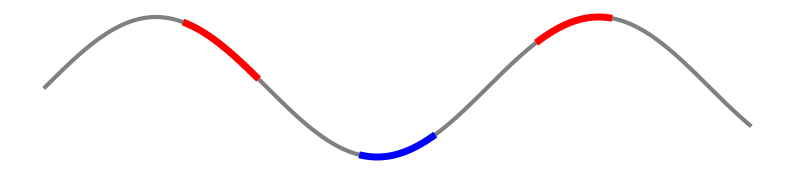

In [29]:
# Create a simple sine wave as an example of a waveform or signal
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Define the sections to be colored
color_sections = [(200, 300, 'red'), (450, 550, 'blue'), (700, 800, 'red')]

# Plot the entire waveform in gray
plt.figure(figsize=(10, 2))
plt.plot(x, y, color='gray', linewidth=3)

# Highlight the specified sections with the chosen colors
for start, end, color in color_sections:
    plt.plot(x[start:end], y[start:end], color=color, linewidth=5)

# Add an arrow to indicate the flow of data
# plt.annotate('', xy=(10, 0), xytext=(0, 0),
#              arrowprops=dict(facecolor='black', shrink=0.05, width=2))
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
# Remove axes for a cleaner look
plt.axis('off')
plt.savefig("/Users/hinase/Downloads/plt.svg")

# Show plot
plt.show()

In [31]:
import cairosvg

# SVGファイルのパス
input_svg_path = "/Users/hinase/Downloads/ss.svg"
# 出力するEPSファイルのパス
output_eps_path = "/Users/hinase/Downloads/ss.eps"

# SVGをEPSに変換
cairosvg.svg2eps(url=input_svg_path, write_to=output_eps_path)

print(f"SVG画像がEPS形式で '{output_eps_path}' に保存されました。")


OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 0x0002): tried: 'libcairo.so.2' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.so.2' (no such file), '/Users/hinase/.pyenv/versions/3.9.19/lib/libcairo.so.2' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/hinase/.pyenv/versions/3.9.19/lib/libcairo.so.2' (no such file), '/opt/homebrew/lib/libcairo.so.2' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file, not in dyld cache), 'libcairo.so.2' (no such file).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 0x0002): tried: 'libcairo.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.2.dylib' (no such file), '/Users/hinase/.pyenv/versions/3.9.19/lib/libcairo.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/hinase/.pyenv/versions/3.9.19/lib/libcairo.2.dylib' (no such file), '/opt/homebrew/lib/libcairo.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libcairo.2.dylib' (no such file), '/usr/lib/libcairo.2.dylib' (no such file, not in dyld cache), 'libcairo.2.dylib' (no such file).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 0x0002): tried: 'libcairo-2.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo-2.dll' (no such file), '/Users/hinase/.pyenv/versions/3.9.19/lib/libcairo-2.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/hinase/.pyenv/versions/3.9.19/lib/libcairo-2.dll' (no such file), '/opt/homebrew/lib/libcairo-2.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libcairo-2.dll' (no such file), '/usr/lib/libcairo-2.dll' (no such file, not in dyld cache), 'libcairo-2.dll' (no such file).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'